In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

In [3]:
#This will download the dataset if you do not have it locally
od.download('https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_stocks.csv')

Skipping, found downloaded files in ".\sp-500-stocks" (use force=True to force download)


In [4]:
#Reading data in
stocks_data = pd.read_csv('sp-500-stocks/sp500_stocks.csv')
stocks_info = pd.read_csv('sp-500-stocks/sp500_companies.csv')

In [5]:
print(stocks_data)
print(stocks_info)

               Date Symbol   Adj Close       Close        High         Low  \
0        2010-01-04    MMM   59.318886   83.019997   83.449997   82.669998   
1        2010-01-05    MMM   58.947342   82.500000   83.230003   81.699997   
2        2010-01-06    MMM   59.783295   83.669998   84.599998   83.510002   
3        2010-01-07    MMM   59.826176   83.730003   83.760002   82.120003   
4        2010-01-08    MMM   60.247749   84.320000   84.320000   83.300003   
...             ...    ...         ...         ...         ...         ...   
1644805  2022-12-21    ZTS  144.919998  144.919998  146.149994  142.779999   
1644806  2022-12-22    ZTS  145.029999  145.029999  145.100006  141.850006   
1644807  2022-12-23    ZTS  145.759995  145.759995  145.889999  143.539993   
1644808  2022-12-27    ZTS  145.300003  145.300003  146.149994  143.570007   
1644809  2022-12-28    ZTS  143.830002  143.830002  146.610001  143.779999   

               Open     Volume  
0         83.089996  3043700.0

In [6]:
#Merging tables
data = stocks_data.merge(stocks_info, how='left', on='Symbol')

In [7]:
data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0,NYQ,3M Company,...,118.29,6.538397e+10,6.969000e+09,-0.036,Saint Paul,MN,United States,95000.0,3M Company operates as a diversified technolog...,0.001941
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0,NYQ,3M Company,...,118.29,6.538397e+10,6.969000e+09,-0.036,Saint Paul,MN,United States,95000.0,3M Company operates as a diversified technolog...,0.001941
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0,NYQ,3M Company,...,118.29,6.538397e+10,6.969000e+09,-0.036,Saint Paul,MN,United States,95000.0,3M Company operates as a diversified technolog...,0.001941
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0,NYQ,3M Company,...,118.29,6.538397e+10,6.969000e+09,-0.036,Saint Paul,MN,United States,95000.0,3M Company operates as a diversified technolog...,0.001941
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0,NYQ,3M Company,...,118.29,6.538397e+10,6.969000e+09,-0.036,Saint Paul,MN,United States,95000.0,3M Company operates as a diversified technolog...,0.001941


In [8]:
print(data.columns)
print(data['Exchange'].unique())
print(data['Sector'].unique())
print(data['Industry'].unique())
print(data['Symbol'].unique())

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Exchange', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')
['NYQ' 'NMS' 'BTS' nan 'NGM']
['Industrials' 'Healthcare' 'Technology' 'Communication Services'
 'Consumer Defensive' 'Consumer Cyclical' 'Utilities' 'Financial Services'
 'Basic Materials' 'Real Estate' 'Energy' nan]
['Conglomerates' 'Specialty Industrial Machinery' 'Medical Devices'
 'Drug Manufacturers—General' 'Information Technology Services'
 'Electronic Gaming & Multimedia' 'Farm Products'
 'Software—Infrastructure' 'Staffing & Employment Services'
 'Specialty Retail' 'Utilities—Diversified' 'Insurance—Life'
 'Diagnostics & Research' 'Specialty Chemicals' 'Airlines' 'REIT—Office'
 'Security & Protection Services' 'Utilities—Regulated Electric'
 'Insurance—Property

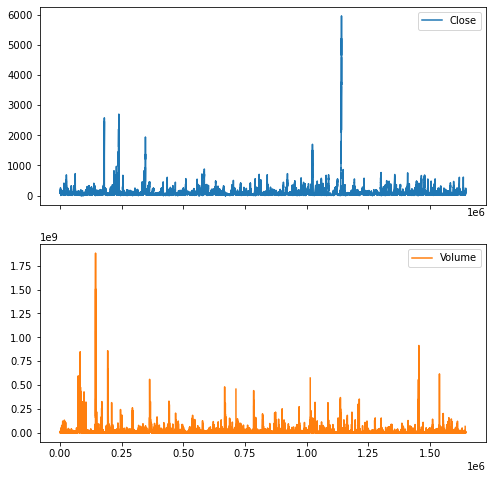

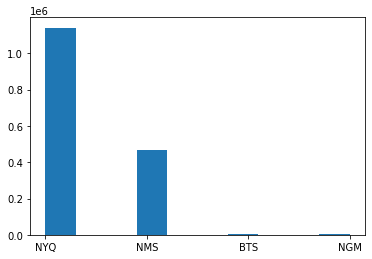

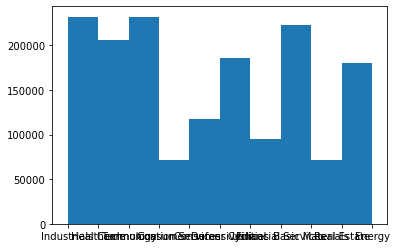

<Figure size 432x288 with 0 Axes>

In [9]:
#Plotting some distributions
data.plot(y=['Close', 'Volume'], subplots=True, figsize = (8,8))
plt.show()
plt.clf()
plt.hist(data['Exchange'].dropna())
plt.show()
plt.clf()
plt.hist(data['Sector'].dropna())
plt.show()
plt.clf()

In [10]:
data.loc[data['Exchange'].isna()]['Symbol'].unique()

array(['CEG', 'ELV', 'GEN', 'META', 'PARA', 'SBUX', 'V', 'WBD', 'WTW'],
      dtype=object)

In [20]:
data.loc[data['Symbol'] == 'META']

In [23]:
#Making a new column for companies with relatively small, medium or large marketcaps.
data['cap_grouping'] = pd.qcut(data['Marketcap'], q=3, labels=['small', 'medium', 'large'])

In [69]:
#Making a ten day moving average column using .rolling method
tenday_avg = []
for i in range(int(len(data)/3270)):
    rolling = data['Close'].iloc[i*3270:(i+1)*3270].rolling(10)
    tenday_avg.extend(list(rolling.mean()))

In [35]:
tenday_avg = data_rolling.mean()

In [1]:
data['tenday_avg'] = tenday_avg['Close']

NameError: name 'tenday_avg' is not defined